Overview of the dataset

In [565]:
import numpy as np
import pandas as pd
df = pd.read_csv("Desktop/Bike/train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [566]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [567]:
df.isnull().sum()
#there does not exist null value in the dataset

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [568]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Change columns to category types

In [569]:
categorylist = ["season","holiday","workingday","weather"]
for var in categorylist:
    df[var]=df[var].astype('category')

In [570]:
df.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

Split the datetime

In [571]:
import datetime
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['day']=pd.to_datetime(df['datetime']).dt.day
df['hour']=pd.to_datetime(df['datetime']).dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [572]:
categorylist = ["year","month","day","hour"]
for var in categorylist:
    df[var]=df[var].astype('category')

Data Visualization

In [573]:
import matplotlib.pyplot as plt
import seaborn as sb

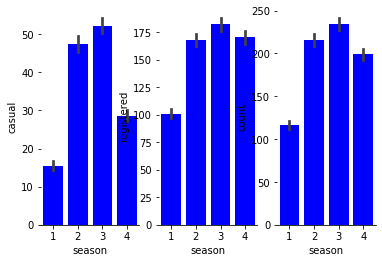

In [585]:
#season:
f,axes = plt.subplots(1,3)
sb.despine(left = True)
sb.barplot('season' ,'casual' , data = df, ax =  axes[0],color='blue')
sb.barplot('season','registered' , data = df, ax = axes[1],color='blue')
sb.barplot('season' ,'count' , data = df, ax = axes[2],color='blue')
#the graph below shows that in autumn and summer, there are much more bike sharing users

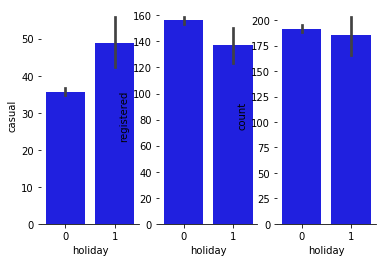

In [587]:
#holiday:
f,axes = plt.subplots(1,3)
sb.despine(left=True)
sb.barplot('holiday','casual',data=df,ax = axes[0],color='blue')
sb.barplot('holiday','registered',data=df,ax= axes[1],color='blue')
sb.barplot('holiday','count',data=df,ax= axes[2],color='blue')
#Overall, non-holiday users are larger than the holiday users
#however, for casual users, holiday users are larger,
#while for registered users, non-holiday users are larger

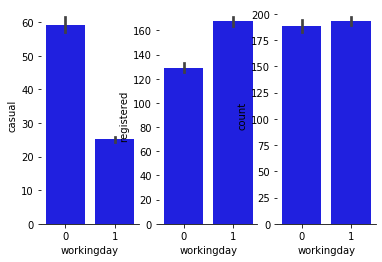

In [588]:
#working day:
f,axes = plt.subplots(1,3)
sb.despine(left=True)
sb.barplot('workingday','casual',data=df,ax=axes[0],color='blue')
sb.barplot('workingday','registered',data=df,ax=axes[1],color='blue')
sb.barplot('workingday','count',data=df,ax=axes[2],color='blue')

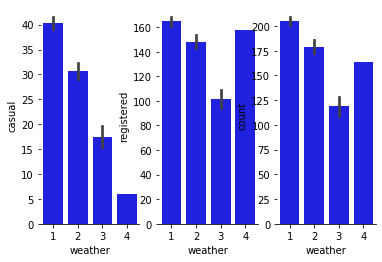

In [596]:
#weather:
f,axes=plt.subplots(1,3)
sb.despine(left=True)
sb.barplot('weather','casual',data=df,ax=axes[0],color='blue')
sb.barplot('weather','registered',data=df,ax=axes[1],color='blue')
sb.barplot('weather','count',data=df,ax=axes[2],color='blue')

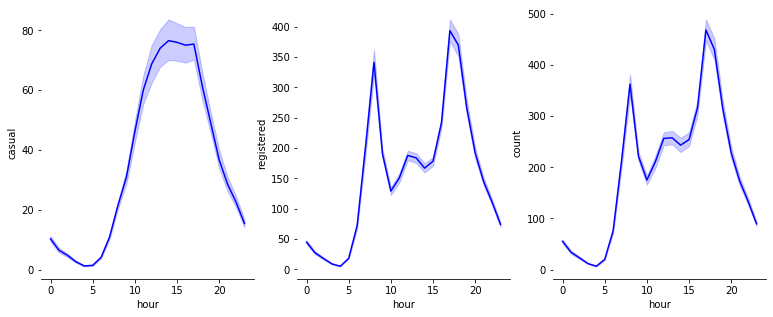

In [606]:
#hour:
f,axes=plt.subplots(1,3,figsize = (13,5))
sb.despine(left=True)
sb.lineplot('hour','casual',data=df,ax=axes[0],color='blue',markers=True)
sb.lineplot('hour','registered',data=df,ax=axes[1],color='blue',markers=True)
sb.lineplot('hour','count',data=df,ax=axes[2],color='blue',markers=True)

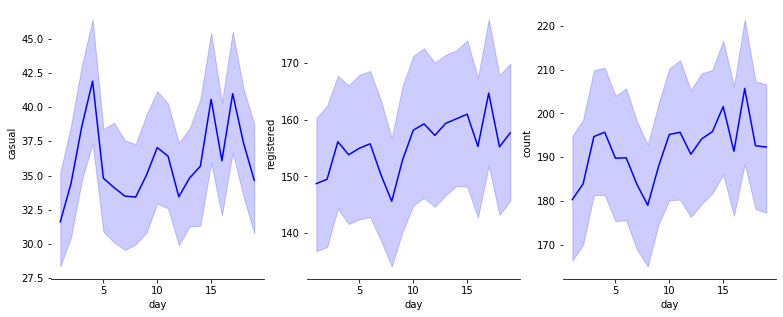

In [607]:
#day:
f,axes=plt.subplots(1,3,figsize = (13,5))
sb.despine(left=True)
sb.lineplot('day','casual',data=df,ax=axes[0],color='blue')
sb.lineplot('day','registered',data=df,ax=axes[1],color='blue')
sb.lineplot('day','count',data=df,ax=axes[2],color='blue')
#from this graph, we can see day has barely influence on the sharing bike using times

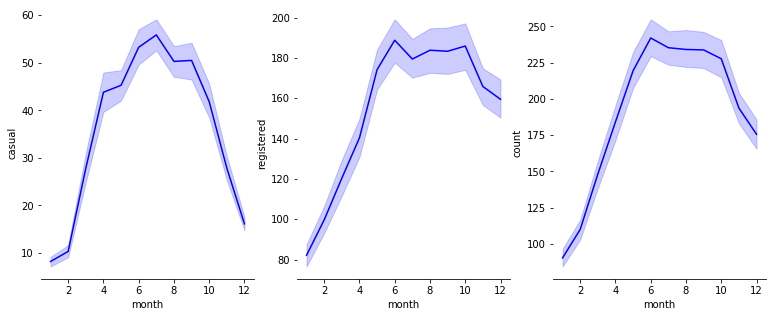

In [608]:
#month:
f,axes=plt.subplots(1,3,figsize = (13,5))
sb.despine(left=True)
sb.lineplot('month','casual',data=df,ax=axes[0],color='blue')
sb.lineplot('month','registered',data=df,ax=axes[1],color='blue')
sb.lineplot('month','count',data=df,ax=axes[2],color='blue')

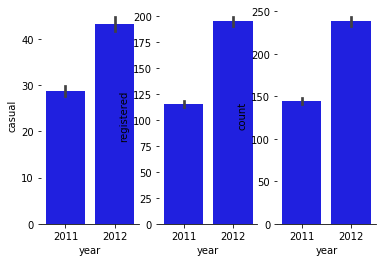

In [615]:
#year:
f,axes=plt.subplots(1,3)
sb.despine(left=True)
sb.barplot('year','casual',data=df,ax=axes[0],color='blue')
sb.barplot('year','registered',data=df,ax=axes[1],color='blue')
sb.barplot('year','count',data=df,ax=axes[2],color='blue')

In [480]:
#correlation matrix:
corr = df[["temp","atemp","humidity","windspeed","casual","registered","count"]].corr()

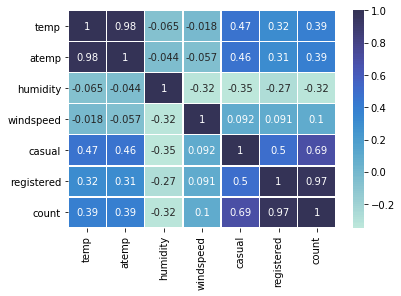

In [481]:
sb.heatmap(corr,annot = True,linewidth = .5,center = 1.4)
#from the graph below:
#1. temp & atemp are highly correlated, we can just use one in the model
#2. windspeed's relationship with # of users is very weak, we can ignore it

In [482]:
df = df.drop(columns=["atemp","windspeed","casual","registered"])

In [483]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,1,2011,1,1,4


Machine Learning

In [484]:
import numpy as np
df.head()
X =df[["year","season","month","day","hour",
       "holiday","workingday","weather","temp",
      "humidity"]]
y =df["count"]

In [485]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

LinearRegression

In [488]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
R2_linear = linear.score(X_train,y_train)
MSE_linear = MSE(y_test,y_pred)
RMSE_linear = MSE_linear**0.5
print('The R^2 is: {:.3f}' .format(R2_linear))
print('The RMSE is: {:.3f}' .format(RMSE_linear))

The R^2 is: 0.388
The RMSE is: 141.343


Lasso

In [489]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [490]:
steps = [('scaler', StandardScaler()),
         ('lasso', Lasso())]
pipeline = Pipeline(steps)
params = {'lasso__alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100]}
gm_cv = GridSearchCV(pipeline, params,cv=5)
gm_cv.fit(X_train,y_train)
print(gm_cv.best_params_)

{'lasso__alpha': 0.3}


In [491]:
y_pred = gm_cv.predict(X_test)
MSE_lasso = MSE(y_test,y_pred)
RMSE_lasso = MSE_lasso**0.5
R2_lasso = gm_cv.best_score_
print('The R^2 is: {:.3f}' .format(R2_lasso))
print('The RMSE is: {:.3f}' .format(RMSE_lasso))

The R^2 is: 0.386
The RMSE is: 141.375


Ridge

In [492]:
from sklearn.linear_model import Ridge
pipeline = Pipeline([('scaler',StandardScaler()),('ridge',Ridge())])
params = {'ridge__alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100]}
gm_cv = GridSearchCV(pipeline,params,cv=5)
gm_cv.fit(X_train,y_train)
y_pred = gm_cv.predict(X_test)
MSE_ridge = MSE(y_test,y_pred)
RMSE_ridge = MSE_ridge**0.5
R2_ridge = gm_cv.best_score_
print(gm_cv.best_params_)
print('The R^2 is: {:.3f}' .format(R2_ridge))
print('The RMSE is: {:.3f}' .format(RMSE_ridge)) 

{'ridge__alpha': 30}
The R^2 is: 0.386
The RMSE is: 141.356


CART

In [493]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=0.1,
                            random_state=42)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
MSE_cart = MSE(y_test,y_pred)
RMSE_cart = MSE_cart**0.5
print('The RMSE is: {:.3f}' .format(RMSE_cart)) 

The RMSE is: 125.462


In [494]:
params = {'max_depth':[1,3,5,7,9],
         'min_samples_leaf':[0.02,0.04,0.08,0.12,0.16,0.2]}
gm_cv = GridSearchCV(tree,params,cv=5)
gm_cv.fit(X_train,y_train)
y_pred = gm_cv.predict(X_test)
RMSE_cartgrid = MSE(y_test,y_pred)**0.5
print(gm_cv.best_params_)
print('The RMSE is {:.3f}'.format(RMSE_cartgrid))

{'max_depth': 9, 'min_samples_leaf': 0.02}
The RMSE is 100.022


Random Forest

In [495]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=9,min_samples_leaf=0.02,n_estimators=200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [496]:
RMSE_rf = MSE(y_test,y_pred)**0.5
print('The RMSE is {:.3f}'.format(RMSE_rf))

The RMSE is 99.746


In [497]:
params = {'max_depth':[3,5,7,9,11,13],
         'min_samples_leaf':[0.02,0.04,0.08,0.12,0.16,0.2],
         'n_estimators':[100,250,500,1000]}
gm_cv = GridSearchCV(rf,params,cv=3)
gm_cv.fit(X_train,y_train)
y_pred = gm_cv.predict(X_test)

In [498]:
print(gm_cv.best_params_)
RMSE_rfgrid = MSE(y_test,y_pred)**0.5
print('The RMSE is {:.3f}'.format(RMSE_rfgrid))

{'max_depth': 13, 'min_samples_leaf': 0.02, 'n_estimators': 100}
The RMSE is 100.038


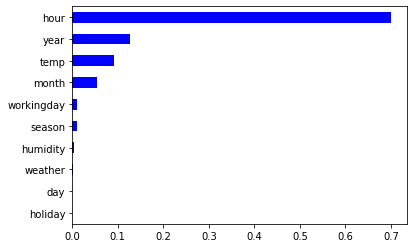

In [612]:
#feature importance
best_model = gm_cv.best_estimator_
best_model.feature_importances_
importances = pd.Series(best_model.feature_importances_,index=X.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='blue')
plt.show()

Adaptive Boosting

In [503]:
from sklearn.ensemble import AdaBoostRegressor
boost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                          n_estimators=200,random_state=42)
boost.fit(X_train,y_train)
y_pred = boost.predict(X_test)
RMSE_adab = MSE(y_test,y_pred)**0.5
print('The RMSE is {:.3f}'.format(RMSE_adab))

The RMSE is 43.954


In [504]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
 'n_estimators': [100,200,500],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }
rs_cv = RandomizedSearchCV(boost,param_dist,cv=3)
rs_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                    criterion='mse',
                                                                                    max_depth=None,
                                                                                    max_features=None,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=2,
                     

In [505]:
y_pred = rs_cv.predict(X_test)
RMSE_adagrid = MSE(y_test,y_pred)**0.5
print(rs_cv.best_params_)
print('The RMSE is {:.3f}'.format(RMSE_adagrid))

{'n_estimators': 500, 'loss': 'linear', 'learning_rate': 1}
The RMSE is 43.863


In [506]:
model = ["Linear","Lasso","Ridge","CART","RandomForest","AdaBoost"]
RMSE = [RMSE_linear,RMSE_lasso,RMSE_ridge,RMSE_cartgrid,RMSE_rfgrid,RMSE_adagrid]
rmseseries = pd.Series(RMSE,index=model)

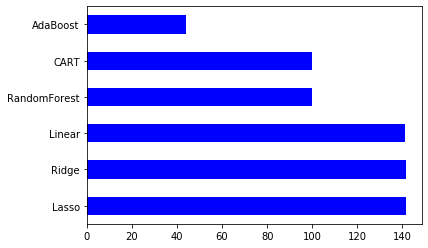

In [613]:
rmseseries_sorted = rmseseries.sort_values(ascending=True) 
rmseseries_sorted.plot(kind="barh",color="blue").invert_yaxis()

In [614]:
pd.DataFrame(y_pred,y_test).head()

,0
count,
127,142.0
13,16.0
163,165.0
233,208.0
222,170.0


Prediciton

In [687]:
test = pd.read_csv("Desktop/Bike/test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [688]:
test['year'] = pd.to_datetime(test['datetime']).dt.year
test['month'] = pd.to_datetime(test['datetime']).dt.month
test['day']=pd.to_datetime(test['datetime']).dt.day
test['hour']=pd.to_datetime(test['datetime']).dt.hour

In [695]:
testx = test.drop(columns=["datetime","windspeed","atemp"])

In [696]:
testx.head()

,season,holiday,workingday,weather,temp,humidity,year,month,day,hour
0,1,0,1,1,10.66,56,2011,1,20,0
1,1,0,1,1,10.66,56,2011,1,20,1
2,1,0,1,1,10.66,56,2011,1,20,2
3,1,0,1,1,10.66,56,2011,1,20,3
4,1,0,1,1,10.66,56,2011,1,20,4


In [697]:
testx.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
year          0
month         0
day           0
hour          0
dtype: int64

In [698]:
category = ["season","holiday","workingday","weather","year","month","day","hour"]
for var in category:
    testx[var] = testx[var].astype("category")

In [699]:
X_new = testx[["year","season","month","day","hour","holiday","workingday","weather","temp","humidity"]]

In [701]:
testx['pred'] = rs_cv.predict(X_new)
testx.describe()

,temp,humidity,pred
count,6493.000000,6493.000000,6493.000000
mean,20.620607,64.125212,191.700293
std,8.059583,19.293391,174.307519
min,0.820000,16.000000,5.000000
25%,13.940000,49.000000,47.000000
50%,21.320000,65.000000,148.000000
75%,27.060000,81.000000,281.000000
max,40.180000,100.000000,897.000000


In [702]:
testx.head()

,season,holiday,workingday,weather,temp,humidity,year,month,day,hour,pred
0,1,0,1,1,10.66,56,2011,1,20,0,20.0
1,1,0,1,1,10.66,56,2011,1,20,1,11.0
2,1,0,1,1,10.66,56,2011,1,20,2,9.0
3,1,0,1,1,10.66,56,2011,1,20,3,7.0
4,1,0,1,1,10.66,56,2011,1,20,4,8.0


In [703]:
testx['pred'] = np.round(testx['pred'])

In [707]:
testx['datetime'] = test['datetime']
final_submission = testx[["datetime","pred"]]

In [713]:
final_submission = final_submission.rename(columns={'pred':'count'})
final_submission.head()

,datetime,count
0,2011-01-20 00:00:00,20.0
1,2011-01-20 01:00:00,11.0
2,2011-01-20 02:00:00,9.0
3,2011-01-20 03:00:00,7.0
4,2011-01-20 04:00:00,8.0


In [714]:
final_submission.to_csv('submission.csv',index=False)